## Paper Reading: Unified Language Model Pre-training for Natural Language Processing and Generation

## Creative Points:
- Use three types of LM to pretrain:
  - Unidirectional LM: Left-to-right/ Right-to-left LM
  - Bidirectional LM
  - Seq2Seq LM:encoder-decoder model
## Application Area:
Natrual Language Understanding(NLU) & Natural Language Generation(NLG): Extractive/Generative Question Aswering, Question Generation, Long Text Generation, Text Summarization
## Advantages:
1. `Unified pre-training`: use shared parameters and architecture in a single Transformer layer for different types of LMs.
2. `Parameter sharing`→learned text representations more general.
  - Context is utilized in different ways, reducing overfitting problem
3. `Seq2Seq LM`→this model also good for NLG work:abstractive summarization, question generation
## Model Architecture:
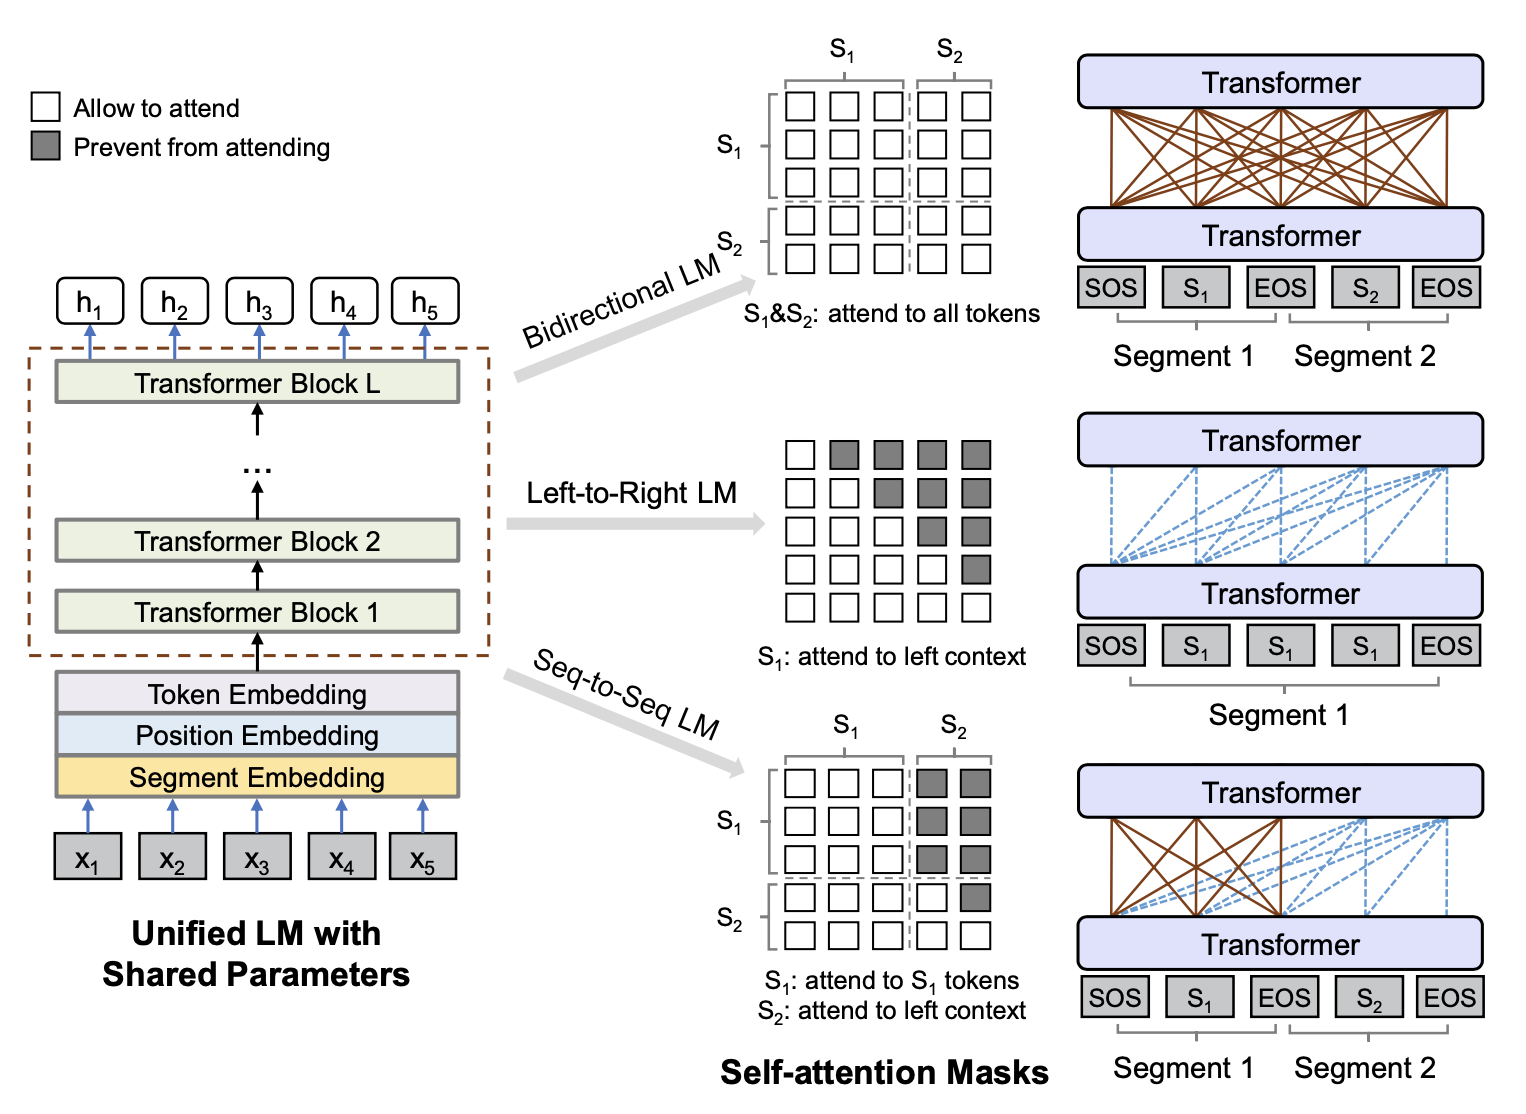


### Input Representation:
- `SOS`:insert to the *beginning* of input (Start-of-Sequence)
- `EOS`:insert to the *ending* of input(End-of-Sequence)
- position embedding: token position of specific segment while the segment can be 0(first segment) or 1(second segment).
- Segment embedding: play a role as **LM identifier**
- For each input token, the vector representation gained by summing three embeddings together.
- `x`: word sequence


### Multi-layer Transformer:
- To control the access to the context of word token to be predicted when computing contextualized representation, the model uses different masks for self-attention
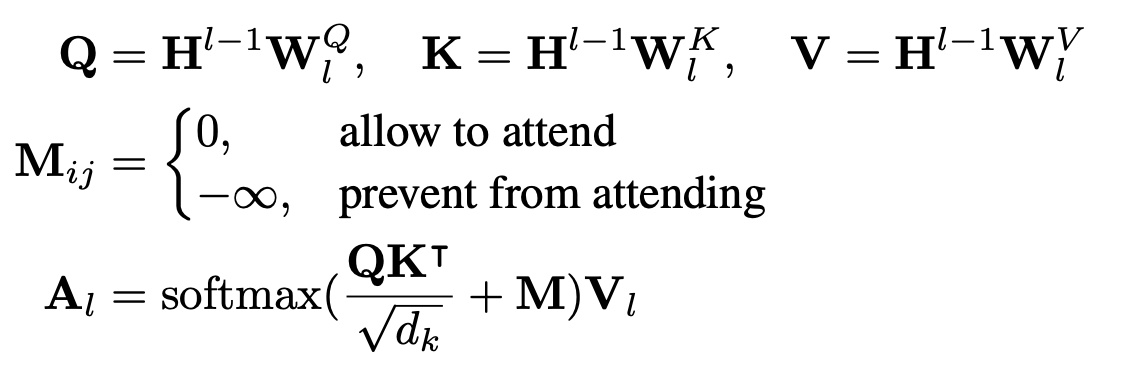
- Notation:
  - Q: Queries
  - K: Keys
  - V: Values
  - Mi,j:Masks matrix decides whether a pairs of tokens can be attend to each other
  - Al: for lth Transformer layer, the output of a self-attention head
  - Hl-1: previous layer's output


### Pre-training Objectives
- **Process**:
input use WordPiece Tokens, some of these replaced with [MASK] in 4 kinds of way→Transformer Network→Softmax→Minimize the cross-entroy loss→predict the masked token
- **Classification**
  - Unidirection LM
    - left2right: M: the left upper triangle matrix=-∞, the other=0.
    - right2left:M: the right lower triangle matrix=-∞, the other=0.
  - Bidirection LM: 
     - every token is allowed to across all positions. M=0.
     - Allows to conduct **Next Sentence Prediction** work.
  - Seq2Seq LM
    - First/Source segment:attend to each other from both directions within the segment
    - Second/Target segment:only attend to the leftward context and itself in the second segment and all the tokens in the source segment.

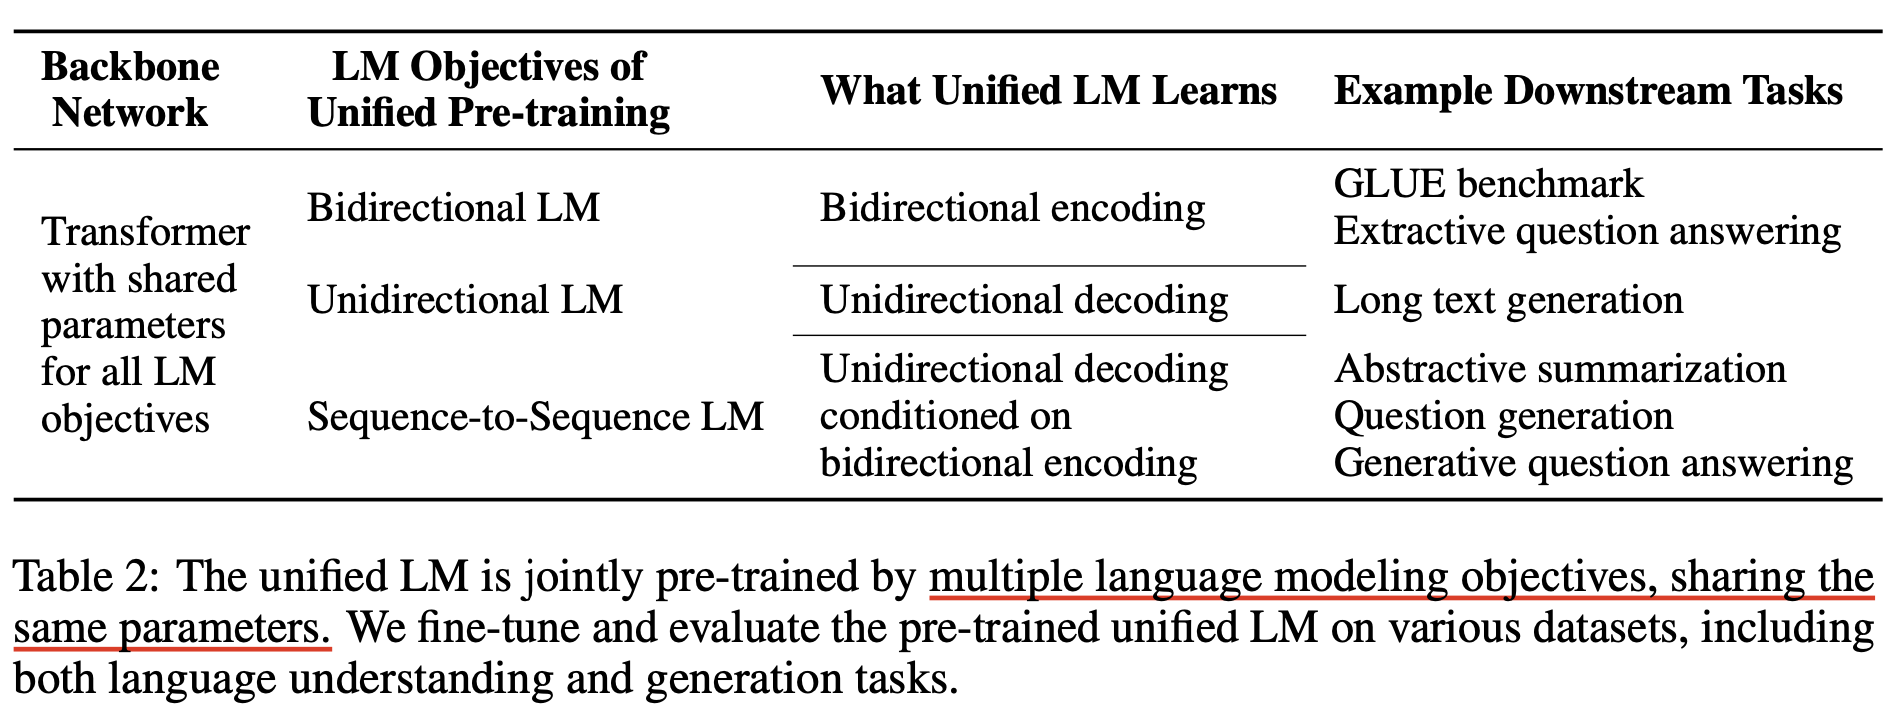



### Pre-trainin Setup
- Overall training objective: sum up three types of LM objectives.
- Time Spent in one training batch:
  - 1/3 bidirection, 1/3 Seq2Seq, 1/6 left-to-right,1/6 right-to-left
- Token masking probability=15%
   - Then, the mask trick types
     - 80% replaced with [MASK]
     - 10% replaced with a random word
     - 10% use the real original word
  - Number of words being masked
     - 80% only one word
     - 20% bigram or trigram
- Model setting: 24-layer transformers, 1024 hidden size, 16 attention heads
- activation function:gelu
- dropout rate=0.1
- weight decay=0.01
- batch size=330
- Initalization: use `bert-large` parameters

### Fine-tuning Tasks


## Sequence-to-Sequence Language Model
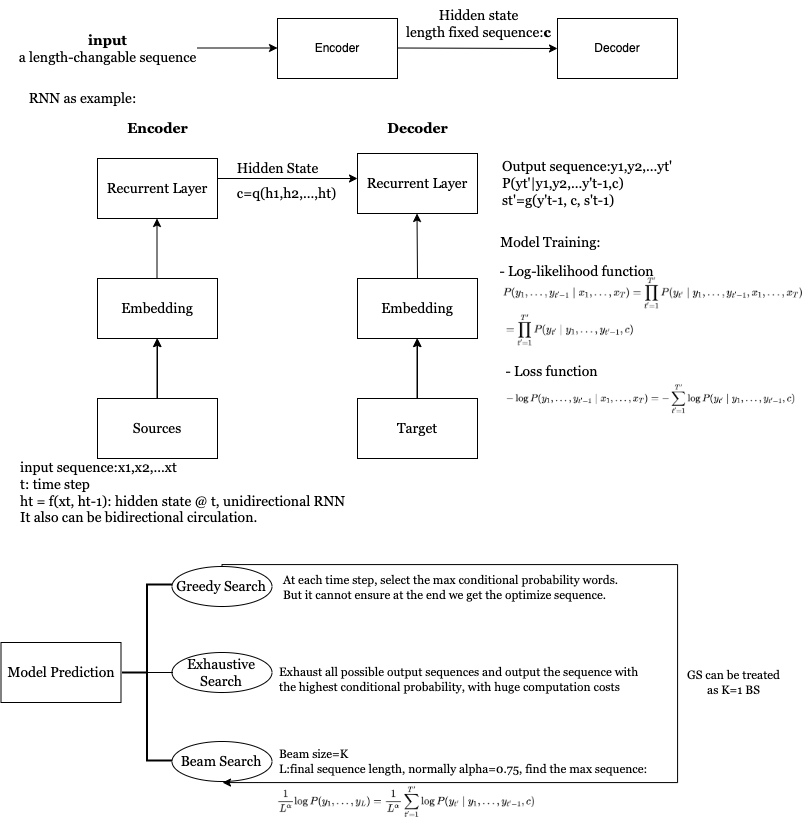

## References:
- 【论文解读】UniLM:一种既能阅读又能自动生成的预训练模型 https://cloud.tencent.com/developer/article/1573393
- UniLM Code Example: https://metatext.io/models/microsoft-unilm-base-cased
- Slides:https://cs.uwaterloo.ca/~mli/Anup.pdf
- Seq2Seq Model.https://github.com/NLP-LOVE/ML-NLP/tree/master/NLP/16.5%20seq2seq
- UniLM知识点 https://zhuanlan.zhihu.com/p/580678159
- Sutskever I., Vinyals O., Le Q.(2014) Sequence to Sequence Learning with Neural Networks.https://arxiv.org/pdf/1409.3215.pdf
- 从语言模型到Seq2Seq：Transformer如戏，全靠Mask https://kexue.fm/archives/6933
- Understanding greedy search and beam search https://medium.com/@jessica_lopez/understanding-greedy-search-and-beam-search-98c1e3cd821d


## Code Example:
https://github.com/bojone/bert4keras/blob/master/examples/task_seq2seq_autotitle.py